

# 0. Import Packages

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

or the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

25104


## 0.1. Folders

The sorted spots are generated from the jupyter notebook here: [3_sort_jie_spots](3_sort_jie_spots.ipynb).

In [2]:
para_subfolder =r'CW_v2_sorted'
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted'
#postanalysis_folder= os.path.join(postanalysis_folder ,para_subfolder)
if not os.path.exists(postanalysis_folder):
    os.mkdir(postanalysis_folder)
#postanalysis_folder= os.path.join(postanalysis_folder ,para_subfolder)
postanalysis_folder

'\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\jie_CW_decode\\postanalysis_v2CW_sorted'

## 0.2 Plotting Parameters

In [3]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

# 1. Load Data

## 1.1 Load and inspect sorted data

In [5]:
main_folder =r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode'
picked_spot_folders = [os.path.join(main_folder, _fl) for _fl in os.listdir(main_folder) if 'exp' in _fl and '_clean' not in _fl]
picked_spot_folders = [os.path.join(_fl,para_subfolder) for _fl in picked_spot_folders]
#picked_spot_folders = [os.path.join(_fl,para_subfolder) for _fl in picked_spot_folders if '20220419' not in _fl]
picked_spot_folders

['\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\jie_CW_decode\\20220316exp\\CW_v2_sorted',
 '\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\jie_CW_decode\\20220402exp\\CW_v2_sorted',
 '\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\jie_CW_decode\\20220419exp\\CW_v2_sorted',
 '\\\\10.245.74.158\\Chromatin_NAS_8\\Exported_data\\jie_CW_decode\\20220713exp\\CW_v2_sorted']

In [6]:
import pandas as pd
output_df_list = []

for picked_spot_folder in picked_spot_folders:
    if os.path.exists(picked_spot_folder):
        file_list = [os.path.join(picked_spot_folder, _fl) for _fl in os.listdir(picked_spot_folder) if '.h5' in _fl]
        df_exp_list = []
        for file in file_list:
            df_exp_list.append(pd.read_hdf(file))
        if len(df_exp_list)>0:
            df_exp = pd.concat(df_exp_list)
            del(df_exp_list)
        else:
            df_exp = None
    else:
        df_exp = None

    output_df_list.append(df_exp)


In [7]:
df_exp.head()

,replicate,FOV,orig_cellID,finalcellID,celltype,chr,hyb,region_name,x_hat,y_hat,z_hat,sig_x,sig_y,sig_z,rowID,fiberidx,fiberidx_jie
23,20220713,18,Cell-10,100502394973884731031710640222794322905,Astro,chr1,12,1:21732182-21745770,259.372640,620.405783,39.411673,1,1,1,23521942,1,1
27,20220713,18,Cell-10,100502394973884731031710640222794322905,Astro,chr1,14,1:23749258-23759965,262.756717,623.565353,44.769108,1,1,1,23520207,1,1
34,20220713,18,Cell-10,100502394973884731031710640222794322905,Astro,chr1,16,1:24241577-24251162,261.750523,626.064167,42.448645,1,1,1,23522032,1,1
44,20220713,18,Cell-10,100502394973884731031710640222794322905,Astro,chr1,21,1:35544821-35559274,257.991170,622.192240,45.894748,1,1,1,23522005,1,1
51,20220713,18,Cell-10,100502394973884731031710640222794322905,Astro,chr1,25,1:38751230-38759983,254.111773,627.143457,41.999315,1,1,1,23518889,1,1


In [8]:
for df_exp in output_df_list:
    if not isinstance(df_exp, type(None)):
        print(len(np.unique(df_exp['finalcellID'])))
    else:
        print(0)

12725
9670
12900
11045


## 1.2 load positions

position files are generated and recorded by [Steve](https://github.com/ZhuangLab/storm-control/tree/master/storm_control/steve)

An example position files can be found in the path below:
[adjusted_translated_positions_all](../../resources/adjusted_translated_positions_all.txt)

In [9]:
# positions
# modify with global coordinates
position_filenames = [
    r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Alignment\adjusted_translated_positions_all.txt',
    r'\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\Alignment\adjusted_translated_positions_all.txt',
    r'\\10.245.74.158\Chromatin_NAS_5\20220419-P_brain_CTP11-13_from_0415storm65\Alignment\adjusted_translated_positions_all.txt',
    r'\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\Alignment\adjusted_translated_positions_all.txt',
]
positions_list = [np.loadtxt(_fl, delimiter=',') for _fl in position_filenames]
#output_position = positions_list[-1]

## 1.3 load MERFISH

In [10]:
import seaborn as sns
import anndata
import scanpy as sc

save_folder = r'\\crick\SSD_0\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
merged_adata = sc.read(os.path.join(save_folder,'new_labeled_data.h5ad'))
adata_ori = merged_adata.raw.to_adata()

print(np.unique(adata_ori.obs['experiment']))

adata_ori

['20220304' '20220329' '20220415' '20220418']


AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## 1.4 load fov-cell-exp_2_uid

In [11]:
ExpFovCell_2_uid = {}

from ImageAnalysis3.segmentation_tools.cell import Align_Segmentation
segLabel_folders = [
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220316-P_brain_CTP11-12-13_from_0304\Analysis_0706\Segmentation',
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220402-P_brain_CTP11-13_from_0329_warp\Analysis_0709\Segmentation',
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220419-CTP11-13_from_0415storm65\Analysis_0813\Segmentation',
    r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220713-P_brain_CTP11-13_from_0418\Analysis_0709\Segmentation'
]
rna_exp_names = ['20220304', '20220329', '20220415', '20220418']
for _exp, _seg_fd in zip(rna_exp_names, segLabel_folders):
    _seg_fls = [os.path.join(_seg_fd, _fl) for _fl in os.listdir(_seg_fd) if '_Segmentation.hdf5' in _fl]
    for _fl in _seg_fls:
        # load segmentation label matrix and uids
        with h5py.File(_fl, 'r') as _f:
            for _fov_id in _f.keys():
                _fov_group = _f[list(_f.keys())[0]]
                _uid_group = _fov_group['cell_2_uid']
                for _cell_id in _uid_group.keys():
                    ExpFovCell_2_uid[(_exp, _fov_id, _cell_id)] = _uid_group[_cell_id][:][0].decode()

len(ExpFovCell_2_uid)

98501

## 1.5 load codebook

**merged_codebook** example can be found below

[merged_codebook_link](../../resources/merged_codebook.csv)

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

# 2. Process

In [14]:
def find_num_fiber(chrom, dict_numFiber):
    return dict_numFiber[chrom]

In [15]:
# save 
from tqdm import tqdm
cellDf_filename = os.path.join(postanalysis_folder, 'CellDfList_test.pkl')

pixel_size = 108
cellType_labelName = 'subclass_label_new'
#cellType_labelName ='subclass_manual_label'

if os.path.exists(cellDf_filename):
    print(f"Directly load cell_dfs")
    cell_dfs = pickle.load(open(cellDf_filename, 'rb'))
else:
    missed_cell = []
    cell_dfs = []
    for _exp_ind, (_exp, _positions, _df) in enumerate(zip(rna_exp_names,positions_list, output_df_list)):
        
        if not isinstance(_df, type(None)):
            
            _fovs = np.unique(_df['FOV'])
            for _fov in tqdm(_fovs):
                _fov_df = _df[_df['FOV']==_fov].copy()
                # convert to micron
                _fov_df[['z_um','x_um','y_um']] = _fov_df[['z_hat','x_hat','y_hat']] * pixel_size / 1000
                # convert to global
                #_fov_df[['x_um','y_um']] = _fov_df[['x_um','y_um']] + np.flipud(_positions[_fov])
                _fov_df[['x_um','y_um']] = _fov_df[['x_um','y_um']] + np.flipud(_positions[int(_fov)])
                # loop through cells to re-assign cell type
                #_fov_df['replicate'] = '2022'+np.unique(_fov_df['replicate'])[0]
                _fov_df['rna_experiment'] = _exp
                # apppend
                #fov_dfs.append(_fov_df)

                # load cell
                for _cell_name in np.unique(_fov_df['orig_cellID']):

                    _cell_df = _fov_df[_fov_df['orig_cellID']==_cell_name].copy()
                    #_exp = np.unique(_cell_df['replicate'])[0]
                    #_fov = str(np.unique(_cell_df['FOV'])[0])
                    _cell = _cell_name.split('Cell-')[1]
                    #_uid = ExpFovCell_2_uid[(_exp,_fov,_cell)]
                    #if not _uid in adata_ori.obs.index:
                        #continue
                    #_cell_df['uid'] = _uid
                    #_cell_df['fov_id'] = _fov
                    _cell_df['cell_id'] = _cell
                    #_cell_df['subclass'] = adata_ori.obs.loc[adata_ori.obs.index==_uid, cellType_labelName].values[0]

                    _cell_df.rename({'finalcellID':'uid',
                                     'FOV':'fov_id', 
                                     #'orig_cellID':'cell_id', 
                                     'celltype':'subclass'}, inplace=True, axis=1)

                    dict_chrFiber_num = {}
                    for chrom, df_fiber in _cell_df.groupby('chr'):
                        dict_chrFiber_num [chrom] = np.max(df_fiber.fiberidx.values)
                    _cell_df['numfiber'] = _cell_df.apply(lambda x:find_num_fiber(x['chr'], dict_chrFiber_num), axis=1)

                    cell_dfs.append(_cell_df)
                    
    # save
    print(f"Saving: {cellDf_filename}")
    pickle.dump(cell_dfs, open(cellDf_filename, 'wb'))
    
print(len(cell_dfs))

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [04:11<00:00,  1.58s/it]


Saving: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\CellDfList_test.pkl
46340


In [16]:
cell_dfs[0]

,replicate,fov_id,orig_cellID,uid,subclass,chr,hyb,region_name,x_hat,y_hat,...,sig_z,rowID,fiberidx,fiberidx_jie,z_um,x_um,y_um,rna_experiment,cell_id,numfiber
5,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr1,0,1:3742742-3759944,246.930420,1463.992800,...,1,2206,1,1,4.147276,3253.588485,-6244.868778,20220304,12,1
15,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr1,4,1:9799472-9811359,245.806113,1475.556400,...,1,3612,1,1,4.753624,3253.467060,-6243.619909,20220304,12,1
17,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr1,5,1:11247744-11257616,253.226687,1468.926267,...,1,72,1,1,5.500038,3254.268482,-6244.335963,20220304,12,1
31,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr1,9,1:20920666-20929358,241.770200,1474.179000,...,1,4943,1,1,5.381981,3253.031182,-6243.768668,20220304,12,1
32,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr1,10,1:21249750-21259997,241.437745,1472.966450,...,1,2066,1,1,4.415525,3252.995276,-6243.899623,20220304,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr9,86,9:106935532-106964965,225.600507,1507.059133,...,1,3358,1,1,5.246824,3251.284855,-6240.217614,20220304,12,1
295,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr9,88,9:108749775-108759943,225.038755,1509.378850,...,1,1480,1,1,5.710913,3251.224186,-6239.967084,20220304,12,1
302,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr9,89,9:109532055-109558895,232.798525,1505.068450,...,1,5437,1,1,6.534312,3252.062241,-6240.432607,20220304,12,1
308,20220316,0,Cell-12,259202492748634617304623818845147108919,Oligo,chr9,92,9:111249941-111259901,223.878623,1509.459933,...,1,50,1,1,5.636320,3251.098891,-6239.958327,20220304,12,1


# 3. Convert to chr_2_zxys and save

In [17]:
sel_cols = ['rna_experiment', 'uid', 'fov_id', 'cell_id', 'subclass',
            'chr', 'hyb', 'fiberidx', 'numfiber', 
            'z_um', 'x_um', 'y_um']
sel_merged_df = pd.concat([_df[sel_cols] for _df in cell_dfs])

In [18]:
sel_merged_filename = os.path.join(postanalysis_folder, 'selected_all_cells.csv')
if not os.path.exists(sel_merged_filename):
    sel_merged_df.to_csv(sel_merged_filename, index=False)

# 4. Convert into chr_2_zxys_list 

In [19]:
chr2Zxys_filename = os.path.join(postanalysis_folder, 'all_chr2Zxys.pkl')

cellInfo_filename = os.path.join(postanalysis_folder, 'all_cellInfo.pkl')

if os.path.exists(chr2Zxys_filename):
    print(f"Loading: {chr2Zxys_filename}")
    chr2ZxysList = pickle.load(open(chr2Zxys_filename, 'rb'))
if os.path.exists(cellInfo_filename):
    print(f"Loading: {cellInfo_filename}")
    cellInfoList = pickle.load(open(cellInfo_filename, 'rb'))

In [20]:
import multiprocessing as mp
from ImageAnalysis3.io_tools.aligner import spAligner_2_chr2homologList
print(len(cell_dfs))
parallel = True

46340


In [21]:
if parallel:
    num_threads = 32
    with mp.Pool(num_threads) as aligner_pool:
        align_results = aligner_pool.starmap(spAligner_2_chr2homologList, [(_cell_df, codebook) for _cell_df in cell_dfs])
        aligner_pool.close()
        aligner_pool.join()
        aligner_pool.terminate()
    len(align_results)
    chr2ZxysList = [_r[0] for _r in align_results]
    cellInfoList = [_r[1] for _r in align_results]
else:
    # sequential version
    chr2ZxysList = []
    cellInfoList = []

    for _cell_df in tqdm(cell_dfs):
        _sel_cell_df = _cell_df[sel_cols]
        chr_2_zxys, info_dict = spAligner_2_chr2homologList(_sel_cell_df, codebook)
        chr2ZxysList.append(chr_2_zxys)
        cellInfoList.append(info_dict)

if not os.path.exists(chr2Zxys_filename):
    print(f"Saving: {chr2Zxys_filename}")
    pickle.dump(chr2ZxysList, open(chr2Zxys_filename, 'wb'))

if not os.path.exists(cellInfo_filename):
    print(f"Saving: {cellInfo_filename}")
    pickle.dump(cellInfoList, open(cellInfo_filename, 'wb'))

Saving: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\all_chr2Zxys.pkl
Saving: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\all_cellInfo.pkl


In [22]:
cellInfoList[0]

{'rna_experiment': '20220304',
 'fov_id': 0,
 'cell_id': '12',
 'subclass': 'Oligo',
 'uid': '259202492748634617304623818845147108919'}

# 5. Partition by subclass

In [23]:
subclass_2_chr2ZxysList = {}
subclass_2_cellInfoList = {}
for _info, _chr2Zxys in zip(cellInfoList, chr2ZxysList):
    _cls = _info['subclass']
    if _cls not in subclass_2_chr2ZxysList:
        subclass_2_chr2ZxysList[_cls] = [_chr2Zxys]
        subclass_2_cellInfoList[_cls] = [_info]
    else:
        subclass_2_chr2ZxysList[_cls].append(_chr2Zxys)
        subclass_2_cellInfoList[_cls].append(_info)

In [24]:
for _cls in subclass_2_chr2ZxysList:
    print(_cls, len(subclass_2_chr2ZxysList[_cls]))

Oligo 6605
L5 IT 3337
Micro 1836
Peri 957
Endo 3738
Astro 4970
OPC 1452
L6 CT 5602
L5 ET 1624
L5/6 NP 784
Pvalb 1317
L6 IT 2428
Lamp5 540
L6b 1044
Sst 1031
SMC 632
L4/5 IT 3388
L2/3 IT 3966
Vip 422
Sncg 173
VLMC 494


In [25]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
if not os.path.exists(subclass_2_chr2Zxys_filename):
    print(f"Saving: {subclass_2_chr2Zxys_filename}")
    pickle.dump(subclass_2_chr2ZxysList, open(subclass_2_chr2Zxys_filename, 'wb'))
    
subclass_2_cellInfo_filename = os.path.join(postanalysis_folder, 'subclass_2_cellInfo.pkl')
if not os.path.exists(subclass_2_cellInfo_filename):
    print(f"Saving: {subclass_2_cellInfo_filename}")
    pickle.dump(subclass_2_cellInfoList, open(subclass_2_cellInfo_filename, 'wb'))

Saving: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\subclass_2_chr2Zxys.pkl
Saving: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\subclass_2_cellInfo.pkl


### subclass to median

In [7]:
subclass_2_median_filename = os.path.join(postanalysis_folder, 'subclass_2_medianDict.pkl')
print(subclass_2_median_filename)

if os.path.exists(subclass_2_median_filename):
    print("Loading")
    subclass_2_medianDict = np.load(subclass_2_median_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key,Chr2ZxysList_2_summaryDict
    # calculate prob
    subclass_2_medianDict = {}
    for _subclass in subclass_2_chr2ZxysList:
        subclass_2_medianDict[_subclass] = Chr2ZxysList_2_summaryDict(
            subclass_2_chr2ZxysList[_subclass], 
            total_codebook=codebook, 
            num_threads=num_threads, verbose=True)
    
    print(f"Saving to: {subclass_2_median_filename}")
    pickle.dump(subclass_2_medianDict, open(subclass_2_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\subclass_2_medianDict.pkl
Loading


### subclass to median

In [22]:
subclass_2_contact_filename = os.path.join(postanalysis_folder, 'subclass_2_contactDict.pkl')
contact_th = 0.6 # 600nm as reference
print(subclass_2_contact_filename)

if os.path.exists(subclass_2_contact_filename):
    print("Loading")
    subclass_2_contactDict = np.load(subclass_2_contact_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDict, contact_prob
    # calculate prob
    subclass_2_contactDict = {}
    for _subclass in subclass_2_chr2ZxysList:
        subclass_2_contactDict[_subclass] = Chr2ZxysList_2_summaryDict(
            subclass_2_chr2ZxysList[_subclass], 
            total_codebook=codebook, 
            function=contact_prob, 
            num_threads=num_threads, verbose=True)
    
    print(f"Saving to: {subclass_2_contact_filename}")
    pickle.dump(subclass_2_contactDict, open(subclass_2_contact_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\subclass_2_contactDict.pkl
Loading


# 6. Partition by major class

In [28]:
class_2_subclass = {
    'Gluta':['L6b', 'L6 CT', 'L6 IT', 'L5 IT', 'L4/5 IT', 'L2/3 IT', 'L5/6 NP', 'L5 ET', ],
    'GABA':['Sncg', 'Sst', 'Vip', 'Pvalb', 'Lamp5', ],
    'Astro':['Astro', ],
    'Endo':['Endo', ],
    'Micro':['Micro', ],
    'Oligo':['Oligo', 'OPC', ],
}
subclass_2_class = {}
for _cls in class_2_subclass:
    for _subcls in class_2_subclass[_cls]:
        subclass_2_class[_subcls] = _cls

In [29]:
# save if not exists
class_2_chr2ZxysList_filename = os.path.join(postanalysis_folder, 'class_2_chr2Zxys.pkl')
class_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'class_2_cellInfo.pkl')

if not os.path.exists(class_2_chr2ZxysList_filename):
    # calculate
    class_2_chr2ZxysList = {_cls:[] for _cls in class_2_subclass.keys()}
    class_2_cellInfoList = {_cls:[] for _cls in class_2_subclass.keys()}

    for _subcls, _chr2ZxysList in subclass_2_chr2ZxysList.items():
        _cellInfoList = subclass_2_cellInfoList[_subcls]
        if _subcls in subclass_2_class:
            class_2_chr2ZxysList[subclass_2_class[_subcls]].extend(_chr2ZxysList)
            class_2_cellInfoList[subclass_2_class[_subcls]].extend(_cellInfoList)
    # plot stats
    for _cls in class_2_chr2ZxysList:
        print(_cls, len(class_2_chr2ZxysList[_cls]))
    # save
    print(f"Writing to file: {class_2_chr2ZxysList_filename}")
    pickle.dump(class_2_chr2ZxysList, open(class_2_chr2ZxysList_filename, 'wb'))
    print(f"Writing to file: {class_2_cellInfoList_filename}")
    pickle.dump(class_2_cellInfoList, open(class_2_cellInfoList_filename, 'wb'))
else:
    print("Loading")
    class_2_chr2ZxysList = pickle.load(open(class_2_chr2ZxysList_filename, 'rb'))
    class_2_cellInfoList = pickle.load(open(class_2_cellInfoList_filename, 'rb'))

Gluta 22173
GABA 3483
Astro 4970
Endo 3738
Micro 1836
Oligo 8057
Writing to file: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\class_2_chr2Zxys.pkl
Writing to file: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\class_2_cellInfo.pkl


### class to median

In [30]:
num_threads = 32

In [31]:
class_2_median_filename = os.path.join(postanalysis_folder, 'class_2_medianDict.pkl')
print(class_2_median_filename)

if os.path.exists(class_2_median_filename):
    print("Loading")
    class_2_medianDict = np.load(class_2_median_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key,Chr2ZxysList_2_summaryDict
    # calculate prob
    class_2_medianDict = {}
    for _class in class_2_chr2ZxysList:
        class_2_medianDict[_class] = Chr2ZxysList_2_summaryDict(
            class_2_chr2ZxysList[_class], 
            total_codebook=codebook, 
            num_threads=num_threads, verbose=True)
    
    print(f"Saving to: {class_2_median_filename}")
    pickle.dump(class_2_medianDict, open(class_2_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\class_2_medianDict.pkl
-- preparing chr_2_zxys from 22173 cells in 22.065s.
-- summarize 231 inter-chr distances with 32 threads in 1135.838s.
-- preparing chr_2_zxys from 3483 cells in 1.031s.
-- summarize 231 inter-chr distances with 32 threads in 176.587s.
-- preparing chr_2_zxys from 4970 cells in 3.349s.
-- summarize 231 inter-chr distances with 32 threads in 175.830s.
-- preparing chr_2_zxys from 3738 cells in 2.479s.
-- summarize 231 inter-chr distances with 32 threads in 155.314s.
-- preparing chr_2_zxys from 1836 cells in 0.309s.
-- summarize 231 inter-chr distances with 32 threads in 105.044s.
-- preparing chr_2_zxys from 8057 cells in 7.298s.
-- summarize 231 inter-chr distances with 32 threads in 425.171s.
Saving to: \\10.245.74.158\Chromatin_NAS_8\Exported_data\jie_CW_decode\postanalysis_v2CW_sorted\class_2_medianDict.pkl


# 7. Plot distmap to inspect

In [9]:
import ImageAnalysis3.structure_tools.distance as distance

In [10]:
 codebook_df = codebook.copy()

In [34]:
class_2_medianDict.keys()

dict_keys(['Gluta', 'GABA', 'Astro', 'Endo', 'Micro', 'Oligo'])

<IPython.core.display.Javascript object>


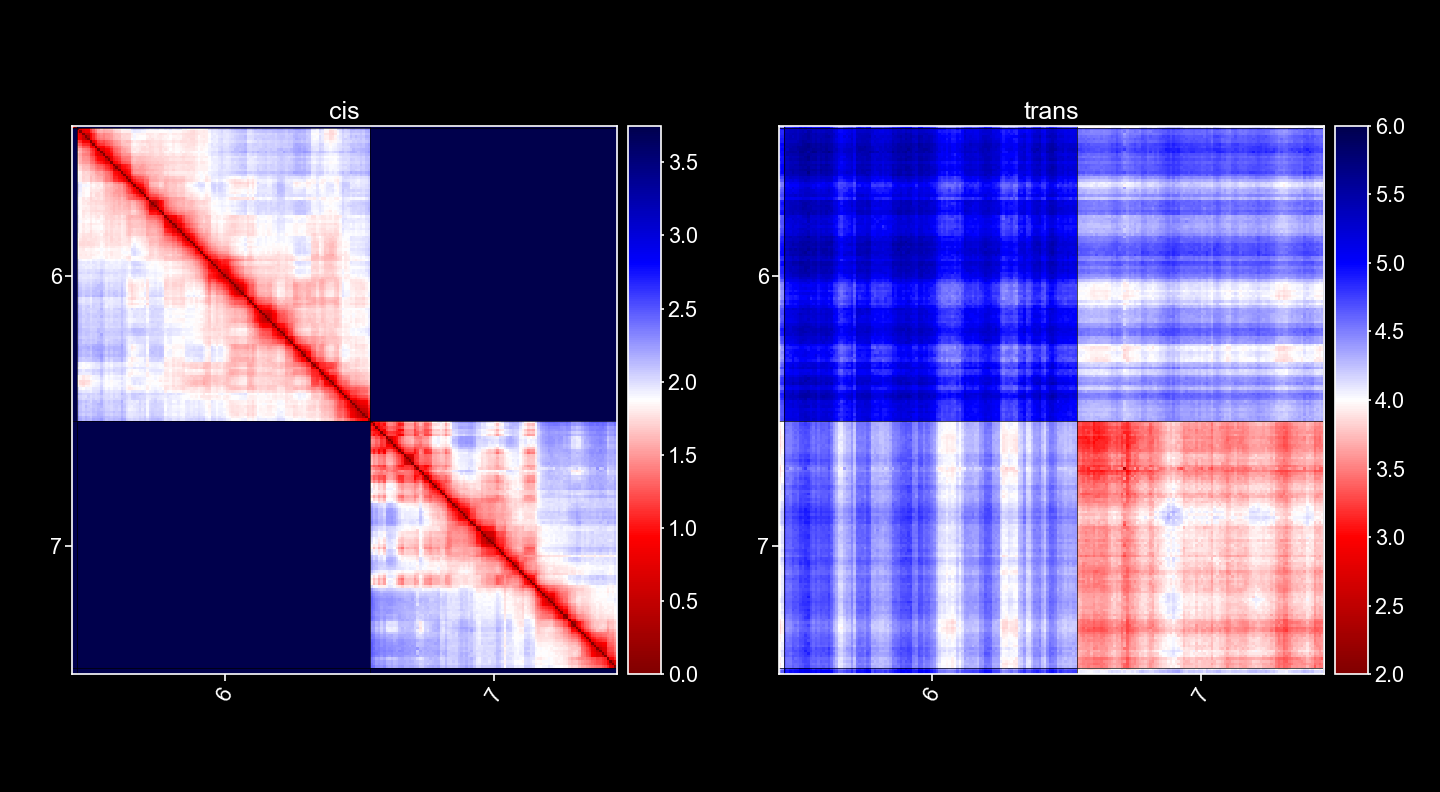

In [35]:
%matplotlib notebook
#%matplotlib inline
plt.style.use('dark_background')
_single_im_size=3
sel_codebook = codebook_df
sort_by_region = False

_class = r'Gluta'
summary_dict = class_2_medianDict[_class]

_cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
        summary_dict, codebook_df, 
        sel_codebook=sel_codebook, 
        use_cis=True, sort_by_region=sort_by_region,
    )
_trans_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
    summary_dict, codebook_df, 
    sel_codebook=sel_codebook, 
    use_cis=False, use_trans=True, sort_by_region=sort_by_region,
)

fig, axes = plt.subplots(1, 2, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=300, sharex=True, sharey=True)

ia.figure_tools.distmap.plot_distance_map(_cis_mat, color_limits=[0,3.75],
                                          ax=axes[0], 
                                            ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names,
                                          font_size=6.5)
ia.figure_tools.distmap.plot_distance_map(_trans_mat, color_limits=[2,6],
                                          ax=axes[1], 
                                          ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names, 
                                          font_size=6.5)

axes[0].set_title(f'cis', fontsize=7.5, pad=2)
axes[1].set_title(f'trans', fontsize=7.5, pad=2)
for _ax in axes:
    _ax.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)

fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
#fig.suptitle(f"{_class}, N={len(class_2_chr_zxys[_class])}", fontsize=10, y=0.97)
#fig.savefig(os.path.join(figure_folder, f"cis-trans-median_distmap_byreg_{_class.replace('/','_')}_high_contrast.png"))
fig.show()